<a href="https://colab.research.google.com/github/lechemrc/Datasets-to-ref/blob/master/Pitchfork%20Reviews/Pitchfork_Reviews_Data_Project_LS_Unit_2_model_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Project: Pitchfork Reviews

This dataset comes from Kaggle and refers to the music review website [Pitchfork](https://pitchfork.com/).

Url: https://www.kaggle.com/nolanbconaway/pitchfork-data

The goal of this project is to use this dataset of music reviews is to be able to predict what the score of any particular artist or genre might be. I also want to predict whether or not an album will get the "Best New Music."

## Setup and Imports

### Setup

In [196]:
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

### Important imports / format

In [0]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
# libraries and math functions
import pandas as pd
import numpy as np
import pandas_profiling
from scipy.io import arff # for loading .arff file
from scipy.stats import randint, uniform
import random

# imports for pipeline and regression
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.utils import resample
from sklearn.utils.multiclass import unique_labels
from ipywidgets import interact, fixed
from xgboost import XGBRegressor, XGBClassifier
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import eli5
from eli5.sklearn import PermutationImportance
import shap

# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing Data

In [199]:
df = pd.read_csv('https://media.githubusercontent.com/media/lechemrc/Datasets-to-ref/master/Pitchfork%20Reviews/pitchfork_reviews.csv', index_col=0)

print(df.shape)
df.head()

(27094, 18)


,reviewid,artist_x,genre,label,title,artist_y,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content
0,22703,massive attack,electronic,virgin,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,krallice,metal,hathenter,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0,"Eight years, five albums, and two EPs in, the ..."
2,22659,uranium club,rock,static shock,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...
3,22659,uranium club,rock,fashionable idiots,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...
4,22661,kleenex,rock,kill rock stars,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0,Kleenex began with a crash. It transpired one ...


## Data Cleaning

Included in Data Wrangling Function

### Column cleaning in chunks without function

previous code used to create data wrangling function

#### Renaming a couple columns for clarity and dropping a redundant column

In [0]:
# df = df.rename(columns={
#     'reviewid':'review_id', 'artist_x':'artist'}).drop(columns=['artist_y'])

# df.head()

#### Setting date time format for 'pub_date'

In [0]:
# df['pub_date'] = pd.to_datetime(df['pub_date'], infer_datetime_format=True)
# df['pub_date'].head()

#### Checking for Null values

In [0]:
# df.isna().sum()

In [0]:
# # dropping 2 blank artist lines (of 26000 lines)
# df = df[df['artist'].isna() != True]
# df.isna().sum()

#### Filling NaN in 'label', 'author_type' with 'other'

In [0]:
# df[df['label'].isna() == True].head()

In [0]:
# # filling in NaNs with 'other'
# df['label'] = df['label'].fillna('other')
# df.isna().sum()

In [0]:
# df['author_type'].value_counts()

In [0]:
# # fill NaNs with 'other
# df['author_type'] = df['author_type'].fillna('other')

# df['author_type'].value_counts()

In [0]:
# df.isna().sum()

In [0]:
# df[df['title'].isna() == True]

In [0]:
# df['title'] = df['title'].fillna('untitled')
# df.isna().sum()

In [0]:
# df[df['genre'].isna() == True].head()

In [0]:
# df['genre'] = df['genre'].fillna('unspecified')
# df['genre'].value_counts()

In [0]:
# df.isna().sum()

In [0]:
# df[df['year'].isna() == True]

In [0]:
# df['year'] = np.where(df['year'].isna() == True, df['pub_year'], df['year'])
# df.isna().sum()

### Feature engineering with 'label' / 'genre'

In [0]:
# df['label'].value_counts().head(15)

In [0]:
# print(df[df['label'] == 'interscope']['score'].mean())

In [0]:
# print(df[df['label'] == 'sub pop']['score'].mean())

In [0]:
# df['label_mean_score'] = df.groupby('label')['score'].transform('mean')
# df['genre_mean_score'] = df.groupby('genre')['score'].transform('mean')
# df.head()

#### Best new music to yes and no, instead of 0 and 1

In [0]:
# df['best_new_music_class'] = df['best_new_music'].map({1:'yes', 0:'no'})
# df.head()

## More Feature Engineering and Data Exploration

Included in Data Wrangling Function

In [0]:
# df = pd.read_csv('https://raw.githubusercontent.com/lechemrc/Datasets-to-ref/master/Pitchfork%20Reviews/pitchfork_reviews.csv')

# print(df.shape)
# df.head()

### Exploring 'author'

In [0]:
# df['author'].nunique()

In [0]:
# df.groupby('author')['score'].transform('mean')

### Exploring "content"

In [0]:
# content_split = df['content'][0].split()
# content_split

In [0]:
# def word_count(str):
#   counts = dict()
#   words = str.split()

#   for word in words:
#     if word in counts:
#       counts[word] += 1
#     else:
#       counts[word] = 1
    
#   return len(counts.keys())

# word_count(df['content'][0])

In [0]:
# df['content'] = df['content'].fillna('no content')
# df['content_length'] = df['content'].str.len().astype(float)
# df['content_unique'] = [word_count(review) for review in df['content']]
# df['content_unique'].head()
                                

In [0]:
# df['content'].isna().sum()

In [0]:
# df.dtypes

### Exploring 'artist'

In [0]:
# len(df[df['artist'] == 'various artists'])

In [0]:
# # 'Various Artists' consists of 3% of the data... I may drop for a better model
# # based on specific artist names
# len(df[df['artist'] == 'various artists']) / df['artist'].count()

In [0]:
# df.columns

In [0]:
# df = df[df['artist'] != 'various artists']

In [0]:
# df['artist'].value_counts()

## Data Wrangling Function

In [0]:
def word_count(str):
  ''' function used for finding the unique number of words for
  each review in the data wrangling function''' 

  counts = dict()
  words = str.split()

  for word in words:
    if word in counts:
      counts[word] += 1
    else:
      counts[word] = 1
    
  return len(counts.keys())




def data_wrangle(df):
  ''' Wrangles the data in specified ways using a copy of the dataframe to 
  prevent the setting copy warning'''

  #s et the copy
  df = df.copy()

  # Renaming columns and dropping redundancy 
  df = df.rename(columns={
    'reviewid':'review_id', 'artist_x':'artist'}).drop(columns=['artist_y'])

  # # Datetime format
  # df['pub_date'] = pd.to_datetime(df['pub_date'], infer_datetime_format=True)

  # dropping the pub_date column instead, since it is extracted into 
  # weekday, month, and year... this is to help with regression and classification
  df = df.drop(columns=['pub_date'])

  # Dropping 'url' ... doesn't seem to be worth much for a model
  df = df.drop(columns=['url'])

  # dropping two null artist rows
  df = df[df['artist'].isna() != True]

  # dropping 'various artists' to better understand how data is tied to 'artist'
  df = df[df['artist'] != 'various artists']

  # filling nulls with 'other', 'untitled', and 'unspecified' respectively
  df['label'] = df['label'].fillna('other')
  df['author_type'] = df['author_type'].fillna('other')
  df['title'] = df['title'].fillna('untitled')
  df['genre'] = df['genre'].fillna('unspecified')
  df['content'] = df['content'].fillna('no content')

  # Feature Engineering: Content Length and Content Unique values
  df['content_length'] = df['content'].str.len().astype(float)
  df['content_unique'] = [word_count(review) for review in df['content']]

  # Set 'best_new_music' to yes / no with 'best_new_music_class
  df['best_new_music_class'] = df['best_new_music'].map({1:'yes', 0:'no'})

  # Where year is null, setting it to the adjacent column value
  df['year'] = np.where(df['year'].isna() == True, df['pub_year'], df['year'])

  # FEATURE ENGINEERING 
  df['label_mean_score'] = df.groupby('label')['score'].transform('mean')
  df['genre_mean_score'] = df.groupby('genre')['score'].transform('mean')
  
  return df

In [234]:
df = data_wrangle(df)
df.head()

,review_id,artist,genre,label,title,score,best_new_music,author,author_type,pub_weekday,pub_day,pub_month,pub_year,year,content,content_length,content_unique,best_new_music_class,label_mean_score,genre_mean_score
0,22703,massive attack,electronic,virgin,mezzanine,9.3,0,nate patrin,contributor,6,8,1,2017,1998.0,"“Trip-hop” eventually became a ’90s punchline,...",9310.0,858,no,6.568675,6.937609
1,22721,krallice,metal,hathenter,prelapsarian,7.9,0,zoe camp,contributor,5,7,1,2017,2016.0,"Eight years, five albums, and two EPs in, the ...",2797.0,294,no,7.900000,7.018696
2,22659,uranium club,rock,static shock,all of them naturals,7.3,0,david glickman,contributor,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,3565.0,365,no,7.833333,6.996065
3,22659,uranium club,rock,fashionable idiots,all of them naturals,7.3,0,david glickman,contributor,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,3565.0,365,no,7.300000,6.996065
4,22661,kleenex,rock,kill rock stars,first songs,9.0,1,jenn pelly,associate reviews editor,4,6,1,2017,2016.0,Kleenex began with a crash. It transpired one ...,7717.0,762,yes,6.973846,6.996065


In [235]:
df['pub_weekday'].value_counts()

1    5972
2    5061
3    4936
0    4934
4    3581
6    1433
5     277
Name: pub_weekday, dtype: int64

**Here's a caveat: I'm currently wondering whether my two last columns that I engineered will lead to too much data leakage, since they are actually based off of the score, my target variable. I will run my models, get feature importance, and use permutation importance to see if that is the case...**

### Visualzing the Data

In [236]:
df['best_new_music'].value_counts()

0    24656
1     1538
Name: best_new_music, dtype: int64

In [237]:
# Scores per genre
px.scatter(df, x='genre', y='score', color='year', opacity=0.1)

This is showing me that genre does have somewhat of an effect on score... you can see what the trends are for each one, though it should be mentioned that some genres have a lot more reviews than other ones.

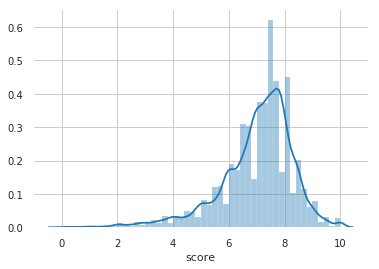

In [238]:
#visualizing score distribution

sns.set_style("whitegrid")
sns.distplot(df['score']);

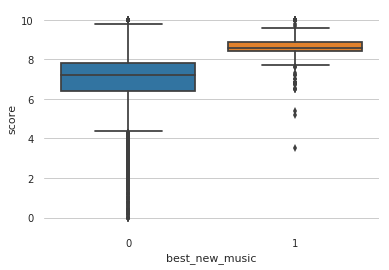

In [239]:
# visualizing the "Best New Music" distribution

sns.boxplot(df['best_new_music'], df['score']);

## Regression Models to predict 'Score'

This will not be my focus... the main focus will be predicting 'Best New Music' distinction. Score can be a secondary analysis if timing is sufficient. 

### Re-import data / data wrangle for clean model

In [240]:
df = pd.read_csv('https://media.githubusercontent.com/media/lechemrc/Datasets-to-ref/master/Pitchfork%20Reviews/pitchfork_reviews.csv', index_col=0)

print(df.shape)
df.head()

(27094, 18)


,reviewid,artist_x,genre,label,title,artist_y,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content
0,22703,massive attack,electronic,virgin,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,krallice,metal,hathenter,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0,"Eight years, five albums, and two EPs in, the ..."
2,22659,uranium club,rock,static shock,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...
3,22659,uranium club,rock,fashionable idiots,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...
4,22661,kleenex,rock,kill rock stars,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0,Kleenex began with a crash. It transpired one ...


In [241]:
df = data_wrangle(df)
df.head()

,review_id,artist,genre,label,title,score,best_new_music,author,author_type,pub_weekday,pub_day,pub_month,pub_year,year,content,content_length,content_unique,best_new_music_class,label_mean_score,genre_mean_score
0,22703,massive attack,electronic,virgin,mezzanine,9.3,0,nate patrin,contributor,6,8,1,2017,1998.0,"“Trip-hop” eventually became a ’90s punchline,...",9310.0,858,no,6.568675,6.937609
1,22721,krallice,metal,hathenter,prelapsarian,7.9,0,zoe camp,contributor,5,7,1,2017,2016.0,"Eight years, five albums, and two EPs in, the ...",2797.0,294,no,7.900000,7.018696
2,22659,uranium club,rock,static shock,all of them naturals,7.3,0,david glickman,contributor,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,3565.0,365,no,7.833333,6.996065
3,22659,uranium club,rock,fashionable idiots,all of them naturals,7.3,0,david glickman,contributor,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,3565.0,365,no,7.300000,6.996065
4,22661,kleenex,rock,kill rock stars,first songs,9.0,1,jenn pelly,associate reviews editor,4,6,1,2017,2016.0,Kleenex began with a crash. It transpired one ...,7717.0,762,yes,6.973846,6.996065


### Setting the train, test, val datasets

In [242]:
 # Setting target and features (with all columns - target) for baseline
 target = 'score'
 features = df.columns.drop(target)

# setting my X and y
 X = df[features]
 y = df[target]
 
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train val split 
# I chose 25% so that I would make the val and test sets the same size
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((15716, 19), (15716,), (5239, 19), (5239,), (5239, 19), (5239,))

### Baseline

In [243]:
df['score'].mean()

7.022795296632612

### Models

#### Linear Regression

with: Ordinal Encoder, Simple Imputer


In [244]:
lin_reg = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LinearRegression(n_jobs=-1)
)

lin_reg.fit(X_train, y_train)
print('Validation Accuracy:', lin_reg.score(X_val, y_val))

Validation Accuracy: 0.33652829916396865


#### Linear Regression

with: OneHot Encoder, Simple Imputer


In [0]:
# lin_reg_oh = make_pipeline(
#     ce.OneHotEncoder(use_cat_names=True),
#     SimpleImputer(),
#     LinearRegression(n_jobs=-1)
# )

# lin_reg_oh.fit(X_train, y_train)
# print('Validation Accuracy:', lin_reg_oh.score(X_val, y_val))

In [246]:
df.nunique()

review_id               17700
artist                   8631
genre                      10
label                    3558
title                   17154
score                     100
best_new_music              2
author                    431
author_type                16
pub_weekday                 7
pub_day                    31
pub_month                  12
pub_year                   19
year                       58
content                 17690
content_length           4851
content_unique            775
best_new_music_class        2
label_mean_score          909
genre_mean_score           10
dtype: int64

This was not good... kept crashing colab. Too many unique values for most columns. I will need to decide what columns to use it on, or just stick to ordinal encoding. 

#### Random Forest Regression

with: Ordinal Encoder, Simple Imputer


In [247]:
random_forest = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

random_forest.fit(X_train, y_train)
print('Validation Accuracy:', random_forest.score(X_val, y_val))

Validation Accuracy: 0.44663452251173064


### Baseline observations:

Overall, the accuracy is quite low on this. When using all the columns, the data in its current state isn't contributing much to the model. However, this is mostly the data as is. I'll continue to engineer features and see if I can tease out a higher score somehow. I will also run a prediction on whether or not an album will get best new music (classification). 

### Function to run multiple regressions for specified labels

In [0]:
def feature_model_regression(target_val, feature_vals, n_estimators=100):
  ''' This will split into Train, Test, and Val sets with specified 
  features and target'''

  # Setting target and features - dropping specific columns
  target = target_val
  features = feature_vals

  # setting my X and y
  X = df[features]
  y = df[target]
 
  # Train test split
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42)

  # Train val split 
  # I chose 25% so that I would make the val and test sets the same size
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, test_size=0.25, random_state=42)

  print(feature_vals)
  print('Shapes for train, test, val:\n', X_train.shape, y_train.shape, 
        X_val.shape, y_val.shape, X_test.shape, y_test.shape)

  pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
  )

  pipeline.fit(X_train, y_train)
  print('\nValidation Accuracy:', pipeline.score(X_val, y_val),
        '\nTest Accuracy:', pipeline.score(X_test, y_test))
  print('--------------------------\n\n')

In [249]:
target = 'score'
for col in df.columns.drop(target):
  feature_model_regression(target, col)

review_id
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: 0.11531841822547517 
Test Accuracy: 0.08619870790600026
--------------------------


artist
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: -0.2226561743649722 
Test Accuracy: -0.25993810561444874
--------------------------


genre
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: 0.0101984021429955 
Test Accuracy: 0.0071243907212218405
--------------------------


label
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: 0.07083597029045585 
Test Accuracy: 0.06833823866413014
--------------------------


title
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: -0.38406794310689785 
Test Accuracy: -0.3825900947067582
--------------------------


best_new_music
Shapes for t

**Well, this is quite interesting. There are even values that contribute negatively to the model, some quite negatively. I will look to ditch those in my model to see how high I can push the accuracy**

In [250]:
feature_model_regression(
    'score', 
    df.columns.drop([target, 'title', 'author_type', 'pub_weekday']),
    n_estimators=200
)

Index(['review_id', 'artist', 'genre', 'label', 'best_new_music', 'author',
       'pub_day', 'pub_month', 'pub_year', 'year', 'content', 'content_length',
       'content_unique', 'best_new_music_class', 'label_mean_score',
       'genre_mean_score'],
      dtype='object')
Shapes for train, test, val:
 (15716, 16) (15716,) (5239, 16) (5239,) (5239, 16) (5239,)

Validation Accuracy: 0.43906654766962594 
Test Accuracy: 0.43711729537006794
--------------------------




Alright, it's up to 43% roughly... an improvement of 13% accuracy... let's see what else I can come up with to boost the score! 

## Classification Models to predict 'Best New Music'

### Re-import data / data wrangle for clean model

In [251]:
df = pd.read_csv('https://media.githubusercontent.com/media/lechemrc/Datasets-to-ref/master/Pitchfork%20Reviews/pitchfork_reviews.csv', index_col=0)

print(df.shape)
df.head()

(27094, 18)


,reviewid,artist_x,genre,label,title,artist_y,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content
0,22703,massive attack,electronic,virgin,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,krallice,metal,hathenter,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0,"Eight years, five albums, and two EPs in, the ..."
2,22659,uranium club,rock,static shock,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...
3,22659,uranium club,rock,fashionable idiots,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...
4,22661,kleenex,rock,kill rock stars,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0,Kleenex began with a crash. It transpired one ...


In [252]:
df = data_wrangle(df)
df.head()

,review_id,artist,genre,label,title,score,best_new_music,author,author_type,pub_weekday,pub_day,pub_month,pub_year,year,content,content_length,content_unique,best_new_music_class,label_mean_score,genre_mean_score
0,22703,massive attack,electronic,virgin,mezzanine,9.3,0,nate patrin,contributor,6,8,1,2017,1998.0,"“Trip-hop” eventually became a ’90s punchline,...",9310.0,858,no,6.568675,6.937609
1,22721,krallice,metal,hathenter,prelapsarian,7.9,0,zoe camp,contributor,5,7,1,2017,2016.0,"Eight years, five albums, and two EPs in, the ...",2797.0,294,no,7.900000,7.018696
2,22659,uranium club,rock,static shock,all of them naturals,7.3,0,david glickman,contributor,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,3565.0,365,no,7.833333,6.996065
3,22659,uranium club,rock,fashionable idiots,all of them naturals,7.3,0,david glickman,contributor,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,3565.0,365,no,7.300000,6.996065
4,22661,kleenex,rock,kill rock stars,first songs,9.0,1,jenn pelly,associate reviews editor,4,6,1,2017,2016.0,Kleenex began with a crash. It transpired one ...,7717.0,762,yes,6.973846,6.996065


### Setting the train, test, val datasets

In [253]:
 # Setting target and features (with all columns - target) for baseline
 target = 'best_new_music_class'
 features = df.columns.drop([target, 'best_new_music']) 
    # dropping 'best_new_music' in order to not leak the data

# setting my X and y
 X = df[features]
 y = df[target]
 
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train val split 
# I chose 25% so that I would make the val and test sets the same size
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((15716, 18), (15716,), (5239, 18), (5239,), (5239, 18), (5239,))

### Models

#### Random Forest Classifier

with: Ordinal Encoder, Simple Imputer


In [254]:
random_forest_class = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

random_forest_class.fit(X_train, y_train)
print('Validation Accuracy:', random_forest_class.score(X_val, y_val))

Validation Accuracy: 0.9828211490742508


### Baseline observations:

Data leakage: with an accuracy of 98%, there's obviously some data leakage going on. I'm going to try and figure out which columns... I'm leaning toward them being the mean columns that I engineered. 

### Exploring the classification models to find leakage

### Creating a function to easily input which columns I want to run a model on

In [0]:
def feature_model_classification(target_val, feature_vals):
  ''' This will split into Train, Test, and Val sets with specified 
  features and target'''

  # Setting target and features - dropping specific columns
  target = target_val
  features = feature_vals

  # setting my X and y
  X = df[features]
  y = df[target]
 
  # Train test split
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42)

  # Train val split 
  # I chose 25% so that I would make the val and test sets the same size
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, test_size=0.25, random_state=42)

  print(feature_vals)
  print('Shapes for train, test, val:\n', X_train.shape, y_train.shape, 
        X_val.shape, y_val.shape, X_test.shape, y_test.shape)

  pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
  )

  pipeline.fit(X_train, y_train)
  print('\nValidation Accuracy:', pipeline.score(X_val, y_val),
        '\nTest Accuracy:', pipeline.score(X_test, y_test))
  print('--------------------------\n\n')

### running the function

In [256]:
df.columns

Index(['review_id', 'artist', 'genre', 'label', 'title', 'score',
       'best_new_music', 'author', 'author_type', 'pub_weekday', 'pub_day',
       'pub_month', 'pub_year', 'year', 'content', 'content_length',
       'content_unique', 'best_new_music_class', 'label_mean_score',
       'genre_mean_score'],
      dtype='object')

In [257]:
df['best_new_music'].value_counts(normalize=True)

0    0.941284
1    0.058716
Name: best_new_music, dtype: float64

In [258]:
target = 'best_new_music_class'
for col in df.columns.drop(target):
  feature_model_classification(target, col)

review_id
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: 0.9410192784882612 
Test Accuracy: 0.9429280397022333
--------------------------


artist
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: 0.9404466501240695 
Test Accuracy: 0.9322389769039893
--------------------------


genre
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: 0.9448368009162054 
Test Accuracy: 0.9373926321817141
--------------------------


label
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: 0.9438824203092193 
Test Accuracy: 0.9375835083031113
--------------------------


title
Shapes for train, test, val:
 (15716,) (15716,) (5239,) (5239,) (5239,) (5239,)

Validation Accuracy: 0.9688871922122543 
Test Accuracy: 0.9641152891773239
--------------------------


score
Shapes for train, test, val:
 (157

This data set is highly imbalanced based on the majority class of 'no' (as in, 'no, this is not best new music') being 94%.

### Resampling to address imbalance in majority class

In [259]:
df['best_new_music_class'].value_counts()

no     24656
yes     1538
Name: best_new_music_class, dtype: int64

In [260]:
df_majority = df[df['best_new_music_class']=='no']
df_minority = df[df['best_new_music_class']=='yes']
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=25332,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['best_new_music_class'].value_counts()

yes    25332
no     24656
Name: best_new_music_class, dtype: int64

In [261]:
df_upsampled.shape

(49988, 20)

In [262]:
df_upsampled.head()

,review_id,artist,genre,label,title,score,best_new_music,author,author_type,pub_weekday,pub_day,pub_month,pub_year,year,content,content_length,content_unique,best_new_music_class,label_mean_score,genre_mean_score
0,22703,massive attack,electronic,virgin,mezzanine,9.3,0,nate patrin,contributor,6,8,1,2017,1998.0,"“Trip-hop” eventually became a ’90s punchline,...",9310.0,858,no,6.568675,6.937609
1,22721,krallice,metal,hathenter,prelapsarian,7.9,0,zoe camp,contributor,5,7,1,2017,2016.0,"Eight years, five albums, and two EPs in, the ...",2797.0,294,no,7.900000,7.018696
2,22659,uranium club,rock,static shock,all of them naturals,7.3,0,david glickman,contributor,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,3565.0,365,no,7.833333,6.996065
3,22659,uranium club,rock,fashionable idiots,all of them naturals,7.3,0,david glickman,contributor,5,7,1,2017,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,3565.0,365,no,7.300000,6.996065
8,22725,taso,electronic,teklife,new start,8.1,0,kevin lozano,tracks coordinator,4,6,1,2017,2016.0,It is impossible to consider a given release b...,3210.0,322,no,7.400000,6.937609


In [0]:
def feature_model_classification_balanced(target_val, feature_vals):
  ''' This will split into Train, Test, and Val sets with specified 
  features and target'''

  # Setting target and features (with all columns - target) for baseline
  target = target_val
  features = feature_vals
    # dropping 'best_new_music' in order to not leak the data

  # setting my X and y
  X = df_upsampled[features]
  y = df_upsampled[target]
 
  # Train test split
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

  # Train val split 
  # I chose 25% so that I would make the val and test sets the same size
  X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

  print('Feature(s):\n', feature_vals)
  # print('\nShapes for train, test, val:\n', X_train.shape, y_train.shape, 
  #       X_val.shape, y_val.shape, X_test.shape, y_test.shape)

  pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    # I did not use SimpleImputer because there are no missing values
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
  )

  pipeline.fit(X_train, y_train)
  print('\nValidation Accuracy:', pipeline.score(X_val, y_val),
        '\nTest Accuracy:', pipeline.score(X_test, y_test))
  print('--------------------------\n\n')

In [264]:
# Testing a single feature
target = 'best_new_music_class'
features = 'genre'
feature_model_classification_balanced(target, features)

Feature(s):
 genre

Validation Accuracy: 0.5584116823364673 
Test Accuracy: 0.5559111822364473
--------------------------




In [265]:
# Testing all features individually
for col in df_upsampled.columns.drop([target]):
  feature_model_classification_balanced('best_new_music_class', col)

Feature(s):
 review_id

Validation Accuracy: 0.9789957991598319 
Test Accuracy: 0.9748949789957991
--------------------------


Feature(s):
 artist

Validation Accuracy: 0.9273854770954191 
Test Accuracy: 0.9324864972994599
--------------------------


Feature(s):
 genre

Validation Accuracy: 0.5584116823364673 
Test Accuracy: 0.5559111822364473
--------------------------


Feature(s):
 label

Validation Accuracy: 0.7784556911382277 
Test Accuracy: 0.7809561912382477
--------------------------


Feature(s):
 title

Validation Accuracy: 0.9971994398879775 
Test Accuracy: 0.9980996199239848
--------------------------


Feature(s):
 score

Validation Accuracy: 0.9282856571314263 
Test Accuracy: 0.9330866173234647
--------------------------


Feature(s):
 best_new_music

Validation Accuracy: 1.0 
Test Accuracy: 1.0
--------------------------


Feature(s):
 author

Validation Accuracy: 0.7051410282056412 
Test Accuracy: 0.7111422284456891
--------------------------


Feature(s):
 author_typ

**review_id**<br> *LEAKY*<br>
Validation Accuracy: 0.9789957991598319 <br>
Test Accuracy: 0.9748949789957991<br><br>

**artist**<br> *POSSIBLY LEAKY*<br>
Validation Accuracy: 0.9273854770954191 <br>
Test Accuracy: 0.9324864972994599<br><br>

**genre**<br>
Validation Accuracy: 0.5584116823364673 <br>
Test Accuracy: 0.5559111822364473<br><br>

**label**<br>
Validation Accuracy: 0.7784556911382277 <br>
Test Accuracy: 0.7809561912382477<br><br>

**title**<br>*LEAKY*<br>
Validation Accuracy: 0.9971994398879775 <br>
Test Accuracy: 0.9980996199239848<br><br>

**score**<br>*POSSIBLY LEAKY*<br>
Validation Accuracy: 0.9282856571314263 <br>
Test Accuracy: 0.9330866173234647<br><br>

**best_new_music**<br>*LEAKY*<br>
Validation Accuracy: 1.0 <br>
Test Accuracy: 1.0<br><br>

**author**<br>
Validation Accuracy: 0.7051410282056412 <br>
Test Accuracy: 0.7111422284456891<br><br>

**author_type**<br>
Validation Accuracy: 0.5915183036607321 <br>
Test Accuracy: 0.5978195639127826<br><br>

**pub_weekday**<br>
Validation Accuracy: 0.5462092418483697 <br>
Test Accuracy: 0.5504100820164033<br><br>

**pub_day**<br>
Validation Accuracy: 0.5437087417483497 <br>
Test Accuracy: 0.5371074214842969<br><br>

**pub_month**<br>
Validation Accuracy: 0.530506101220244 <br>
Test Accuracy: 0.5227045409081816<br><br>

**pub_year**<br>
Validation Accuracy: 0.6375275055011003 <br>
Test Accuracy: 0.6303260652130426<br><br>

**year**<br>
Validation Accuracy: 0.6242248449689938 <br>
Test Accuracy: 0.6150230046009202<br><br>

**content**<br>*LEAKY*<br>
Validation Accuracy: 1.0 <br>
Test Accuracy: 1.0<br><br>

**content_length**<br>*POSSIBLY LEAKY*<br>
Validation Accuracy: 0.9267853570714143 <br>
Test Accuracy: 0.9303860772154431<br><br>

**content_unique**<br>
Validation Accuracy: 0.7720544108821764 <br>
Test Accuracy: 0.7801560312062412<br><br>

**label_mean_score**<br>
Validation Accuracy: 0.7404480896179236 <br>
Test Accuracy: 0.7461492298459692<br><br>

**genre_mean_score**<br>
Validation Accuracy: 0.5584116823364673 <br>
Test Accuracy: 0.5559111822364473<br><br>

In [266]:
yes = df.groupby(df['best_new_music_class'] )['artist'].value_counts()
yes[yes == 'yes'].value_counts()

Series([], Name: artist, dtype: int64)

#### Best New Music per artist / author

In [267]:
# Finding the highest number of 'Best New Music' per artist

df_filter = df[df['best_new_music_class'] == 'yes']
artist_bnm = pd.crosstab(df['artist'], df_filter['best_new_music_class'])
artist_bnm = pd.DataFrame(artist_bnm)
artist_bnm['yes'].sort_values(ascending=False)

artist
m83                            16
kanye west                     13
saint etienne                  12
lcd soundsystem                12
m.i.a.                         11
animal collective              10
the knife                      10
spiritualized                  10
the velvet underground          9
r.e.m.                          9
beach house                     9
menomena                        8
how to dress well               8
beastie boys                    8
bikini kill                     8
john lennon                     8
miles davis                     8
oneohtrix point never           8
jawbreaker                      8
yoko ono                        8
burial                          8
ride                            8
kendrick lamar                  7
the smashing pumpkins           7
deerhunter                      7
drake                           7
radiohead                       6
jay z                           6
deerhoof                        6
grandad

In [268]:
# Finding the highest number of 'Best New Music' per author

df_filter = df[df['best_new_music_class'] == 'yes']
artist_bnm = pd.crosstab(df['author'], df_filter['best_new_music_class'])
artist_bnm = pd.DataFrame(artist_bnm)
artist_bnm['yes'].sort_values(ascending=False)

author
mark richardson                      148
ian cohen                            102
brandon stosuy                        61
ryan dombal                           57
jayson greene                         56
stuart berman                         55
marc hogan                            47
lindsay zoladz                        42
mike powell                           34
mark pytlik                           32
seth colter walls                     31
stephen m. deusner                    31
joe tangari                           29
nate patrin                           28
jess harvell                          27
matt lemay                            27
andy beta                             26
larry fitzmaurice                     25
scott plagenhoef                      25
tom breihan                           24
jenn pelly                            23
tom ewing                             22
philip sherburne                      22
brian howe                            21
marc mast

### Final Model Test

Some hyperparameter tuning being done still

In [269]:
target = 'best_new_music_class'
features = ['author_type']
feature_model_classification_balanced(target, features)

Feature(s):
 ['author_type']

Validation Accuracy: 0.5915183036607321 
Test Accuracy: 0.5978195639127826
--------------------------




In [270]:
px.scatter(df, x='author', y='score', color='best_new_music_class')

Every single pair of features that I use generally puts the accuracy up in the high 90% range, which tells me that it's especially subjective at Pitchfork... what I mean by that is that they tend to favor certain artists, labels, and genres, and that specific authors will tend to give the distinction of 'best new music' to similar artists, or so it seems to be the case

### Permutation Importances

In [271]:
# Using eli5 to find permutation importances

# transforming data for permuter
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val)

# setting model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# setting permuter to permutation importance
permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=3,
    random_state=42
)

# fitting the data
permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)

Weight,Feature
0.0825 ± 0.0031,score
0.0104 ± 0.0017,review_id
0.0042 ± 0.0011,content_length
0.0041 ± 0.0011,content_unique
0.0034 ± 0.0010,author
0.0025 ± 0.0014,artist
0.0018 ± 0.0010,pub_year
0.0015 ± 0.0006,label
0.0011 ± 0.0003,content
0.0011 ± 0.0006,title


### ROC AUC Score

In [272]:
df.columns

Index(['review_id', 'artist', 'genre', 'label', 'title', 'score',
       'best_new_music', 'author', 'author_type', 'pub_weekday', 'pub_day',
       'pub_month', 'pub_year', 'year', 'content', 'content_length',
       'content_unique', 'best_new_music_class', 'label_mean_score',
       'genre_mean_score'],
      dtype='object')

In [277]:
df_upsampled.columns

Index(['review_id', 'artist', 'genre', 'label', 'title', 'score',
       'best_new_music', 'author', 'author_type', 'pub_weekday', 'pub_day',
       'pub_month', 'pub_year', 'year', 'content', 'content_length',
       'content_unique', 'best_new_music_class', 'label_mean_score',
       'genre_mean_score'],
      dtype='object')

In [283]:
target = 'best_new_music_class'
features = df.columns.drop(target)
  # dropping 'best_new_music' in order to not leak the data

# setting my X and y
X = df_upsampled[features]
y = df_upsampled[target]
 
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)

# Train val split 
# I chose 25% so that I would make the val and test sets the same size
X_train, X_val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=0.25, random_state=42)
  
random_forest_class = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

random_forest_class.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['artist', 'genre', 'label', 'title',
                                      'author', 'author_type', 'content'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'artist',
                                          'data_type': dtype('O'),
                                          'mapping': jack white                        1
chief keef                        2
univers zero                      3
united state of electronica       4
m.i.a.                            5
sinister luck ensemble            6
james b...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',


In [284]:
# ROC Score

y_pred_proba = random_forest_class.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_proba)

1.0

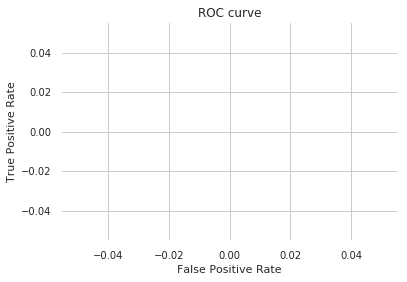

In [285]:
# Plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val==1, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

## Visualizations of the data

In [0]:
px.box(df, 
    x='best_new_music_class', 
    y='score',
    color = 'best_new_music_class',
    title = 'Scores for "Yes" and "No" in relation to "Best New Music"', 
    hover_data=['artist', 'title', 'label', 'score'])

In [0]:
px.scatter(df, x='author', y='score', color='best_new_music_class')

In [0]:
px.scatter(df, 
           x='content_unique', 
           y='content_length', 
           color='best_new_music_class',
           opacity=0.5,
           trendline='ols',
           title='Number of Words  vs  Unique Number of Words',
           hover_data=['artist', 'title', 'score', 'content_length', 'content_unique'])

In [0]:
px.scatter(df, 
           x='content_length', 
           y='score', 
           color='best_new_music_class', 
           trendline='ols',
           hover_data=['artist', 'title', 'score', 'content_length', 'content_unique'])